# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [ ]:
# Load and check the dataset

from google.colab import drive
import pandas as pd

# Connect to Google Drive
drive.mount('/content/drive')

# Specify the dataset path
dataset_path = '/content/drive/My Drive/BTS_short_100.csv'

# Load the dataset
df = pd.read_csv(dataset_path, encoding="UTF-8")

# Show the first few rows of the dataset
df.head(10)

Mounted at /content/drive


,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
6,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."
8,5533886,2015,1086,553.0,8.0,"Scenic World\n\nAuthor's Note:\n\nUn beta'd, m..."
9,4547622,2015,1094,15.0,2.0,Um.\n\nAuthor's Note:\n\nI think I wrote this ...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [ ]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [ ]:
# Check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [ ]:
# H0 (answer in words):

Low levels of masculinity in male characters do not significantly affect fanfiction success, regardless of the value of the relevant variable

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


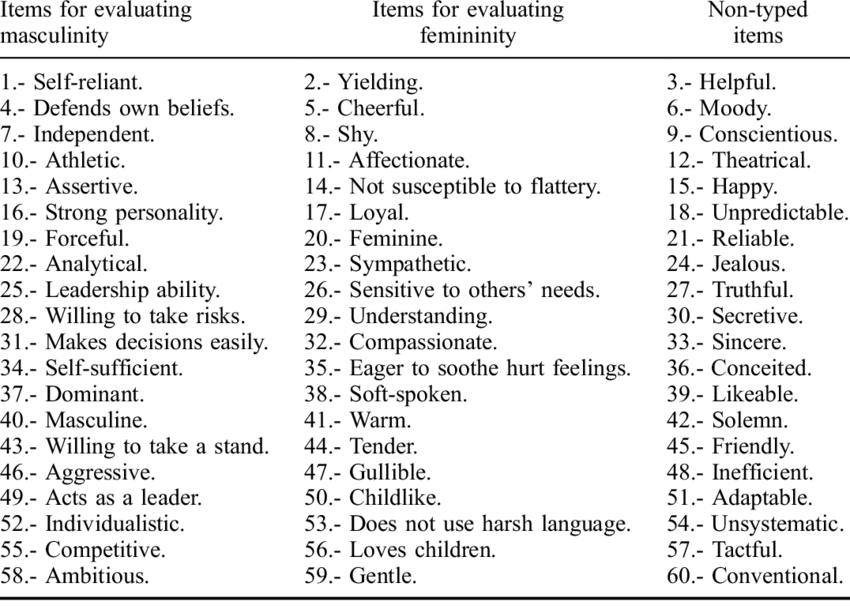

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [ ]:
! git clone https://github.com/maartensap/riveter-nlp.git

Cloning into 'riveter-nlp'...
remote: Enumerating objects: 610, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 610 (delta 141), reused 164 (delta 109), pack-reused 392
Receiving objects: 100% (610/610), 5.24 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [ ]:
%ls

drive/  riveter-nlp/  sample_data/


In [ ]:
!pip install -U spacy-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade spacy
# This will downlaod ~500Mb of data
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 29.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Usin

In [ ]:
!python -m spacy validate

2024-05-16 08:51:59.883911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 08:51:59.883977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 08:51:59.996235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 08:52:00.220211: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 08:52:02.473391: W tensorflow/compiler/tf2

In [ ]:
!python -m spacy download en_core_web_sm

2024-05-16 08:52:44.725862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 08:52:44.725925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 08:52:44.727353: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 08:52:44.735276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 08:52:46.070834: W tensorflow/compiler/tf2

In [ ]:
!pip install seaborn

Now we have prepared all the dependencies needed.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Navigate to the directory containing the riveter module
%cd /content/gdrive/MyDrive/riveter

# Now import the Riveter module
from riveter import Riveter

Mounted at /content/gdrive
/content/gdrive/MyDrive/riveter


In [ ]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [ ]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [ ]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'

# Load lexicon 'power'
riveter = Riveter()
riveter.load_sap_lexicon('power')

# Create an empty dictionary 'scores_dict'
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [ ]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

  # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    # Define patterns for male pronouns
    riveter.train(segments, text_ids, num_bootstraps=20, persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:57<1:25:54, 57.92s/it]

2024-05-16 09:54:16 Complete!
Story ID: 4706144, Masculine Power Score: 0.08350709542589409



Processing stories:   2%|▏         | 2/90 [01:30<1:02:54, 42.90s/it]

2024-05-16 09:54:48 Complete!
Story ID: 4752980, Masculine Power Score: 0.2559866377350631



Processing stories:   3%|▎         | 3/90 [01:59<52:51, 36.45s/it]  

2024-05-16 09:55:17 Complete!
Story ID: 4621698, Masculine Power Score: 0.6260317460317462



Processing stories:   4%|▍         | 4/90 [02:35<52:26, 36.59s/it]

2024-05-16 09:55:54 Complete!
Story ID: 3651108, Masculine Power Score: 0.11583508802146911



Processing stories:   6%|▌         | 5/90 [03:10<50:39, 35.76s/it]

2024-05-16 09:56:28 Complete!
Story ID: 5282729, Masculine Power Score: 0.2184494991269185



Processing stories:   7%|▋         | 6/90 [03:42<48:39, 34.75s/it]

2024-05-16 09:57:01 Complete!
Story ID: 5533886, Masculine Power Score: -0.006021825396825398



Processing stories:   8%|▊         | 7/90 [04:17<47:54, 34.63s/it]

2024-05-16 09:57:35 Complete!
Story ID: 4547622, Masculine Power Score: 0.04381977340285174



Processing stories:   9%|▉         | 8/90 [04:46<45:05, 33.00s/it]

2024-05-16 09:58:05 Complete!
Story ID: 16177508, Masculine Power Score: 0.1382064155975376



Processing stories:  10%|█         | 9/90 [05:19<44:13, 32.76s/it]

2024-05-16 09:58:37 Complete!
Story ID: 15745185, Masculine Power Score: -0.1025792499938997



Processing stories:  11%|█         | 10/90 [05:51<43:28, 32.60s/it]

2024-05-16 09:59:09 Complete!
Story ID: 15654528, Masculine Power Score: 0.1850494689182115



Processing stories:  12%|█▏        | 11/90 [06:21<42:03, 31.94s/it]

2024-05-16 09:59:40 Complete!
Story ID: 7448155, Masculine Power Score: 0.3257068405453318



Processing stories:  13%|█▎        | 12/90 [06:55<42:09, 32.43s/it]

2024-05-16 10:00:13 Complete!
Story ID: 4983847, Masculine Power Score: 0.0919356556051072



Processing stories:  14%|█▍        | 13/90 [07:29<42:20, 33.00s/it]

2024-05-16 10:00:48 Complete!
Story ID: 3313118, Masculine Power Score: -0.22873070769809897



Processing stories:  16%|█▌        | 14/90 [08:01<41:20, 32.64s/it]

2024-05-16 10:01:19 Complete!
Story ID: 3290390, Masculine Power Score: -0.09709072383962333



Processing stories:  17%|█▋        | 15/90 [08:39<42:44, 34.20s/it]

2024-05-16 10:01:57 Complete!
Story ID: 36435301, Masculine Power Score: 0.08289929164542167



Processing stories:  18%|█▊        | 16/90 [09:11<41:17, 33.49s/it]

2024-05-16 10:02:29 Complete!
Story ID: 36575491, Masculine Power Score: 0.2637921232883714



Processing stories:  19%|█▉        | 17/90 [09:43<40:11, 33.04s/it]

2024-05-16 10:03:01 Complete!
Story ID: 35225224, Masculine Power Score: 0.2419626759340634



Processing stories:  20%|██        | 18/90 [10:15<39:15, 32.71s/it]

2024-05-16 10:03:33 Complete!
Story ID: 4594527, Masculine Power Score: 0.1850801975801976



Processing stories:  21%|██        | 19/90 [10:43<37:17, 31.51s/it]

2024-05-16 10:04:02 Complete!
Story ID: 5485625, Masculine Power Score: 0.10520858451892934



Processing stories:  22%|██▏       | 20/90 [11:12<35:56, 30.80s/it]

2024-05-16 10:04:31 Complete!
Story ID: 36408319, Masculine Power Score: 0.13369217160548433



Processing stories:  23%|██▎       | 21/90 [11:50<37:53, 32.95s/it]

2024-05-16 10:05:09 Complete!
Story ID: 35762659, Masculine Power Score: 0.20771466647484269



Processing stories:  24%|██▍       | 22/90 [12:27<38:26, 33.92s/it]

2024-05-16 10:05:45 Complete!
Story ID: 35603194, Masculine Power Score: 0.37122677383112956



Processing stories:  26%|██▌       | 23/90 [12:59<37:32, 33.62s/it]

2024-05-16 10:06:18 Complete!
Story ID: 35344306, Masculine Power Score: 0.11734730626230223



Processing stories:  27%|██▋       | 24/90 [13:28<35:18, 32.10s/it]

2024-05-16 10:06:46 Complete!
Story ID: 36695155, Masculine Power Score: 0.11555555555555555



Processing stories:  28%|██▊       | 25/90 [14:01<35:05, 32.39s/it]

2024-05-16 10:07:20 Complete!
Story ID: 36064474, Masculine Power Score: 0.11077337726835576



Processing stories:  29%|██▉       | 26/90 [14:34<34:46, 32.60s/it]

2024-05-16 10:07:53 Complete!
Story ID: 36024820, Masculine Power Score: 0.17189475355902903



Processing stories:  30%|███       | 27/90 [15:12<35:45, 34.05s/it]

2024-05-16 10:08:30 Complete!
Story ID: 35182330, Masculine Power Score: 0.07008404828686135



Processing stories:  31%|███       | 28/90 [15:49<36:11, 35.03s/it]

2024-05-16 10:09:07 Complete!
Story ID: 36567496, Masculine Power Score: 0.21445802535552672



Processing stories:  32%|███▏      | 29/90 [16:23<35:11, 34.62s/it]

2024-05-16 10:09:41 Complete!
Story ID: 35560330, Masculine Power Score: 0.12135755368303691



Processing stories:  33%|███▎      | 30/90 [16:58<34:59, 34.99s/it]

2024-05-16 10:10:17 Complete!
Story ID: 35877496, Masculine Power Score: 0.1364655060059884



Processing stories:  34%|███▍      | 31/90 [17:34<34:32, 35.13s/it]

2024-05-16 10:10:52 Complete!
Story ID: 35957410, Masculine Power Score: 0.2939407476304991



Processing stories:  36%|███▌      | 32/90 [18:06<33:03, 34.21s/it]

2024-05-16 10:11:24 Complete!
Story ID: 30947654, Masculine Power Score: 0.021819289603318644



Processing stories:  37%|███▋      | 33/90 [18:40<32:31, 34.24s/it]

2024-05-16 10:11:59 Complete!
Story ID: 36332707, Masculine Power Score: -0.10711064498052776



Processing stories:  38%|███▊      | 34/90 [19:17<32:43, 35.07s/it]

2024-05-16 10:12:36 Complete!
Story ID: 35967940, Masculine Power Score: 0.18564435177510033



Processing stories:  39%|███▉      | 35/90 [19:52<32:05, 35.00s/it]

2024-05-16 10:13:11 Complete!
Story ID: 35001073, Masculine Power Score: 0.12597236097236095



Processing stories:  40%|████      | 36/90 [20:28<31:47, 35.32s/it]

2024-05-16 10:13:47 Complete!
Story ID: 35138911, Masculine Power Score: 0.13377744734298125



Processing stories:  41%|████      | 37/90 [20:58<29:45, 33.70s/it]

2024-05-16 10:14:17 Complete!
Story ID: 35280397, Masculine Power Score: 0.22407914673046253



Processing stories:  42%|████▏     | 38/90 [21:37<30:30, 35.20s/it]

2024-05-16 10:14:55 Complete!
Story ID: 36049939, Masculine Power Score: 0.3716363116522622



Processing stories:  43%|████▎     | 39/90 [22:15<30:39, 36.06s/it]

2024-05-16 10:15:33 Complete!
Story ID: 34995673, Masculine Power Score: 0.16347193176183322



Processing stories:  44%|████▍     | 40/90 [22:57<31:30, 37.81s/it]

2024-05-16 10:16:15 Complete!
Story ID: 33477346, Masculine Power Score: 0.431715000685589



Processing stories:  46%|████▌     | 41/90 [23:27<29:07, 35.67s/it]

2024-05-16 10:16:46 Complete!
Story ID: 36840832, Masculine Power Score: -0.22159458962090542



Processing stories:  47%|████▋     | 42/90 [23:56<26:46, 33.48s/it]

2024-05-16 10:17:14 Complete!
Story ID: 30896276, Masculine Power Score: 0.060357142857142866



Processing stories:  48%|████▊     | 43/90 [24:25<25:09, 32.13s/it]

2024-05-16 10:17:43 Complete!
Story ID: 37363471, Masculine Power Score: 0.4144805194805194



Processing stories:  49%|████▉     | 44/90 [24:56<24:20, 31.76s/it]

2024-05-16 10:18:14 Complete!
Story ID: 36984901, Masculine Power Score: 0.13196009308541276



Processing stories:  50%|█████     | 45/90 [25:27<23:44, 31.66s/it]

2024-05-16 10:18:46 Complete!
Story ID: 33353644, Masculine Power Score: 0.021388868253463145



Processing stories:  51%|█████     | 46/90 [25:58<23:08, 31.57s/it]

2024-05-16 10:19:17 Complete!
Story ID: 37002835, Masculine Power Score: -0.14223776223776224



Processing stories:  52%|█████▏    | 47/90 [26:29<22:19, 31.15s/it]

2024-05-16 10:19:47 Complete!
Story ID: 5630824, Masculine Power Score: 0.3148661126500462



Processing stories:  53%|█████▎    | 48/90 [27:02<22:17, 31.85s/it]

2024-05-16 10:20:21 Complete!
Story ID: 10053617, Masculine Power Score: 0.23044175190427918



Processing stories:  54%|█████▍    | 49/90 [27:36<22:14, 32.56s/it]

2024-05-16 10:20:55 Complete!
Story ID: 1572659, Masculine Power Score: 0.23567513368983958



Processing stories:  56%|█████▌    | 50/90 [28:12<22:21, 33.54s/it]

2024-05-16 10:21:31 Complete!
Story ID: 7450573, Masculine Power Score: 0.2596502568638791



Processing stories:  57%|█████▋    | 51/90 [28:46<21:50, 33.59s/it]

2024-05-16 10:22:04 Complete!
Story ID: 6918676, Masculine Power Score: 0.019741434924821263



Processing stories:  58%|█████▊    | 52/90 [29:23<22:00, 34.74s/it]

2024-05-16 10:22:42 Complete!
Story ID: 6075402, Masculine Power Score: 0.36572163699171584



Processing stories:  59%|█████▉    | 53/90 [30:01<21:53, 35.51s/it]

2024-05-16 10:23:19 Complete!
Story ID: 11101779, Masculine Power Score: 0.3519375361480625



Processing stories:  60%|██████    | 54/90 [30:37<21:30, 35.85s/it]

2024-05-16 10:23:56 Complete!
Story ID: 11321331, Masculine Power Score: 0.10497670786598716



Processing stories:  61%|██████    | 55/90 [31:09<20:08, 34.53s/it]

2024-05-16 10:24:27 Complete!
Story ID: 12284853, Masculine Power Score: 0.02811879766086254



Processing stories:  62%|██████▏   | 56/90 [31:40<19:02, 33.61s/it]

2024-05-16 10:24:59 Complete!
Story ID: 12282003, Masculine Power Score: 0.10427325417571603



Processing stories:  63%|██████▎   | 57/90 [32:10<17:55, 32.60s/it]

2024-05-16 10:25:29 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [32:43<17:24, 32.63s/it]

2024-05-16 10:26:02 Complete!
Story ID: 4228053, Masculine Power Score: 0.21328317258327867



Processing stories:  66%|██████▌   | 59/90 [33:17<17:07, 33.13s/it]

2024-05-16 10:26:36 Complete!
Story ID: 12127317, Masculine Power Score: 0.16242909187890645



Processing stories:  67%|██████▋   | 60/90 [33:47<16:01, 32.05s/it]

2024-05-16 10:27:05 Complete!
Story ID: 12010134, Masculine Power Score: 0.18895439598764405



Processing stories:  68%|██████▊   | 61/90 [34:22<15:59, 33.09s/it]

2024-05-16 10:27:41 Complete!
Story ID: 11510919, Masculine Power Score: 0.4529231118344022



Processing stories:  69%|██████▉   | 62/90 [34:56<15:27, 33.13s/it]

2024-05-16 10:28:14 Complete!
Story ID: 8145802, Masculine Power Score: 0.21814507482350015



Processing stories:  70%|███████   | 63/90 [35:28<14:46, 32.83s/it]

2024-05-16 10:28:46 Complete!
Story ID: 6637942, Masculine Power Score: -0.18505247593888813



Processing stories:  71%|███████   | 64/90 [35:59<14:01, 32.38s/it]

2024-05-16 10:29:18 Complete!
Story ID: 7427905, Masculine Power Score: -0.03231113466407585



Processing stories:  72%|███████▏  | 65/90 [36:30<13:21, 32.06s/it]

2024-05-16 10:29:49 Complete!
Story ID: 3893857, Masculine Power Score: 0.14395981091642482



Processing stories:  73%|███████▎  | 66/90 [37:02<12:46, 31.96s/it]

2024-05-16 10:30:21 Complete!
Story ID: 33040258, Masculine Power Score: 0.1636111111111111



Processing stories:  74%|███████▍  | 67/90 [37:40<12:54, 33.68s/it]

2024-05-16 10:30:58 Complete!
Story ID: 33858850, Masculine Power Score: -0.17222783322628524



Processing stories:  76%|███████▌  | 68/90 [38:15<12:29, 34.07s/it]

2024-05-16 10:31:33 Complete!
Story ID: 2775776, Masculine Power Score: 0.2342027417027417



Processing stories:  77%|███████▋  | 69/90 [38:48<11:51, 33.89s/it]

2024-05-16 10:32:07 Complete!
Story ID: 3197963, Masculine Power Score: 0.33985042735042736



Processing stories:  78%|███████▊  | 70/90 [39:21<11:09, 33.49s/it]

2024-05-16 10:32:39 Complete!
Story ID: 12395199, Masculine Power Score: 0.16720358281926967



Processing stories:  79%|███████▉  | 71/90 [39:51<10:18, 32.56s/it]

2024-05-16 10:33:10 Complete!
Story ID: 10934010, Masculine Power Score: 0.25338522588522594



Processing stories:  80%|████████  | 72/90 [40:21<09:32, 31.79s/it]

2024-05-16 10:33:40 Complete!
Story ID: 12301116, Masculine Power Score: -0.04784089902398377



Processing stories:  81%|████████  | 73/90 [40:54<09:04, 32.04s/it]

2024-05-16 10:34:12 Complete!
Story ID: 12706317, Masculine Power Score: -0.12994381932933824



Processing stories:  82%|████████▏ | 74/90 [41:29<08:47, 32.96s/it]

2024-05-16 10:34:47 Complete!
Story ID: 11499468, Masculine Power Score: 0.01917785922361248



Processing stories:  83%|████████▎ | 75/90 [42:00<08:05, 32.36s/it]

2024-05-16 10:35:18 Complete!
Story ID: 12184146, Masculine Power Score: 0.35116372247823857



Processing stories:  84%|████████▍ | 76/90 [42:34<07:39, 32.82s/it]

2024-05-16 10:35:52 Complete!
Story ID: 12201333, Masculine Power Score: 0.0937139369673599



Processing stories:  86%|████████▌ | 77/90 [43:11<07:23, 34.11s/it]

2024-05-16 10:36:29 Complete!
Story ID: 11496030, Masculine Power Score: 0.10230394159345824



Processing stories:  87%|████████▋ | 78/90 [43:46<06:54, 34.54s/it]

2024-05-16 10:37:05 Complete!
Story ID: 11510277, Masculine Power Score: 0.25273284265988594



Processing stories:  88%|████████▊ | 79/90 [44:23<06:25, 35.08s/it]

2024-05-16 10:37:41 Complete!
Story ID: 10772274, Masculine Power Score: 0.3909808289009091



Processing stories:  89%|████████▉ | 80/90 [44:56<05:46, 34.63s/it]

2024-05-16 10:38:15 Complete!
Story ID: 12646050, Masculine Power Score: 0.03955777601899485



Processing stories:  90%|█████████ | 81/90 [45:28<05:04, 33.81s/it]

2024-05-16 10:38:47 Complete!
Story ID: 11161479, Masculine Power Score: -0.021180606496673568



Processing stories:  91%|█████████ | 82/90 [46:00<04:25, 33.18s/it]

2024-05-16 10:39:18 Complete!
Story ID: 12069936, Masculine Power Score: 0.10642167677881965



Processing stories:  92%|█████████▏| 83/90 [46:33<03:51, 33.12s/it]

2024-05-16 10:39:51 Complete!
Story ID: 12285972, Masculine Power Score: 0.4009342761859783



Processing stories:  93%|█████████▎| 84/90 [47:03<03:13, 32.31s/it]

2024-05-16 10:40:22 Complete!
Story ID: 12372702, Masculine Power Score: -0.031106835771773585



Processing stories:  94%|█████████▍| 85/90 [47:38<02:45, 33.11s/it]

2024-05-16 10:40:57 Complete!
Story ID: 12610496, Masculine Power Score: 0.09552018169898097



Processing stories:  96%|█████████▌| 86/90 [48:13<02:13, 33.47s/it]

2024-05-16 10:41:31 Complete!
Story ID: 10970472, Masculine Power Score: 0.05992965367965367



Processing stories:  97%|█████████▋| 87/90 [48:41<01:35, 31.98s/it]

2024-05-16 10:42:00 Complete!
Story ID: 12084552, Masculine Power Score: 0.3088351718943825



Processing stories:  98%|█████████▊| 88/90 [49:19<01:07, 33.68s/it]

2024-05-16 10:42:37 Complete!
Story ID: 12727119, Masculine Power Score: -0.0306554128907644



Processing stories:  99%|█████████▉| 89/90 [49:50<00:32, 32.87s/it]

2024-05-16 10:43:08 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [50:22<00:00, 33.58s/it]

2024-05-16 10:43:40 Complete!
Story ID: 10859508, Masculine Power Score: 0.276228947742213


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [ ]:
# Q2 (code)
# Sample 5 rows from the dataframe
sample = df.sample(n=5)

# Print the sample
print(sample)

    story_id  published_year  words  kudos  comments  \
57  10053617            2017   1110   43.0       9.0   
65  12282003            2017   1034   22.0       NaN   
87  11510277            2017   1031   75.0       4.0   
95  10970472            2017   1090   60.0       6.0   
60   6918676            2016   1136   30.0       NaN   

                                        story_content  masculine_power_score  
57  Label\n\nAuthor's Note:\n\nJust based on a spe...               0.230442  
65  bliss;\n\n“Are you sure about this?” Yes.\n\n“...               0.104273  
87  A quiet Sunday afternoon\n\nAuthor's Note:\n\n...               0.252733  
95  You're my best friend\n\nAuthor's Note:\n\nTra...               0.059930  
60  Free | Jimin, You\n\nTitle: Free\n\nType: Scen...               0.019741  


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [ ]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=ab832f890301b107d46adf83c1e5406ba9f4b05df5765d3ac845c20f0ee11dda
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness


In [ ]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.083507,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.255987,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.626032,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.115835,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.218449,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'story_id'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'comments'}>,
        <Axes: title={'center': 'masculine_power_score'}>],
       [<Axes: title={'center': 'lexical_richness'}>, <Axes: >, <Axes: >]],
      dtype=object)

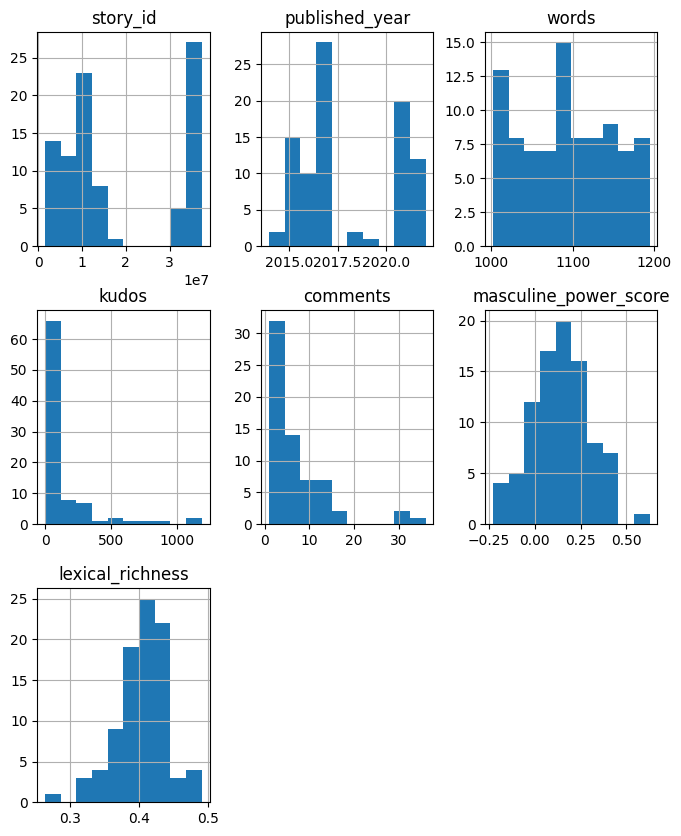

In [ ]:
# Q3a (code): Check data distribution
df.hist(figsize=(8,10))

In [ ]:
# Q3b (code): compute some descriptive statistics
# Compute descriptive statistics
descriptive_stats = df.describe()

# Display descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
           story_id  published_year        words        kudos   comments  \
count  9.000000e+01       90.000000    90.000000    89.000000  65.000000   
mean   1.839576e+07     2018.088889  1094.344444   135.393258   6.923077   
std    1.307922e+07        2.612177    55.327048   229.972311   7.005149   
min    1.572659e+06     2014.000000  1002.000000     1.000000   1.000000   
25%    7.448760e+06     2016.000000  1042.250000    20.000000   2.000000   
50%    1.224167e+07     2017.000000  1095.000000    54.000000   5.000000   
75%    3.517148e+07     2021.000000  1141.750000   122.000000   9.000000   
max    3.736347e+07     2022.000000  1194.000000  1190.000000  36.000000   

       masculine_power_score  lexical_richness  
count              90.000000         90.000000  
mean                0.142327          0.405027  
std                 0.162076          0.037109  
min                -0.228731          0.264443  
25%                 0.040623          0.384458

In [ ]:
# Q3b(analysis):

Based on the above statistics, we can first analyze from a single variable. I'll take the following four variables as examples.

1. kudos： kudos has a mean value of about 135.39 and a std of 229.97, indicating a wide range of values. The data as a whole is skewed to the right with a minimum value of 1 and a maximum value of 1190 and has a median of 54 which indicates a relatively low number of honours for most of the observations.

2. masculine_power_score: The mean value of this data is about 0.14, with a standard deviation of 0.16. we can observe that the data is approximately normally distributed, with values ranging from -0.24 to 0.59. This indicates that most of the scores for this item are clustered around the mean, with fewer scores that are too high and too low.


3. published_year:The mean year of publication is about 2018.09 with a standard deviation of 2.61.The values from 2014 to 2022 show a trend of decreasing and then increasing, and it can be observed from the graph that there is a significant decrease in the values for 2018 and 2019.


4. words: The average number of words is about 1094.34 with a standard deviation of 55.33.The data distribution is relatively even overall. But the values in the interval 1075-1110 show a sudden increase.


By analyzing these variables as a  single, it seems that there is no obvious similar trend between them. I'm going to put two variables together for analysis.


1. story count and published year: There are a total of 90 stories in the dataset, with the earliest story published in 2014 and the latest in 2022. The average publication year of the stories is approximately 2018. The standard deviation of publication years is 2.61, indicating that the distribution of most stories' publication years is relatively concentrated between 2016 and 2021.

2. relationship between kudos and comments: The standard deviations of kudos and comments are 229.97 and 7.01, respectively, indicating a relatively dispersed distribution and significant differences between kudos and comments.

3. masculine_power_score and lexical richness: The standard deviations of masculine_power_score and lexical richness are 0.161 and 0.037, respectively, indicating a relatively dispersed distribution and some differences between them. The median values of masculine_power_score and lexical richness are 0.135 and 0.410, respectively, indicating that the majority of samples in the dataset have lower masculine power scores and higher lexical richness.

In [ ]:
# Q3c (code): Check for any missing values

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

Missing Values:
story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64


In the results above, we can see that the "kudos" column has one missing value and the "comments" column has 25 missing values. We will deal with this in the next step.

In [ ]:
# Q3d (code): replace all the NA values with zeros and check again Q3c

# Replace NaN values with zeros
df.fillna(0, inplace=True)

# Check for missing values again
missing_values_after_fillna = df.isnull().sum()

# Display missing values after filling with zeros
print("Missing Values after filling with zeros:")
print(missing_values_after_fillna)

Missing Values after filling with zeros:
story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

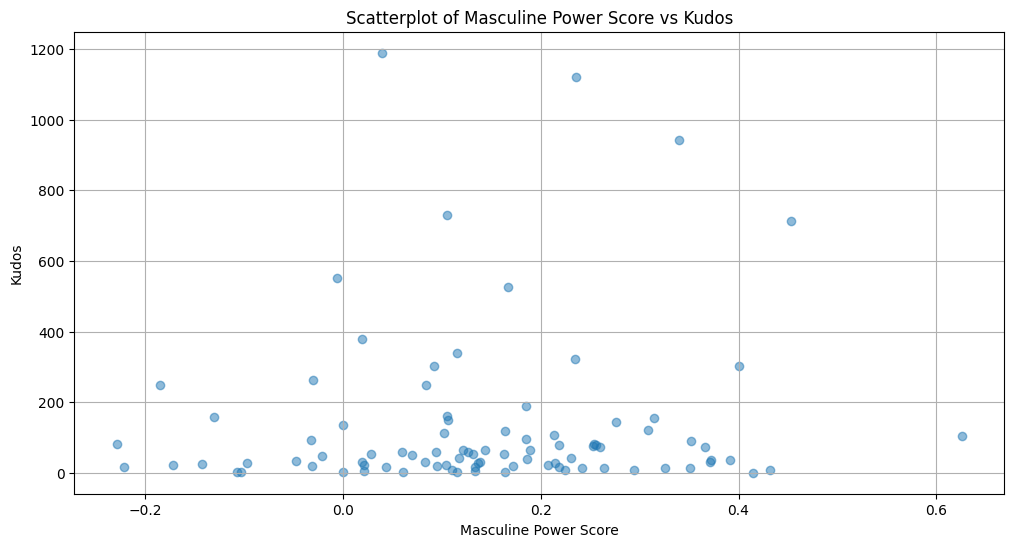

In [ ]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos

import matplotlib.pyplot as plt

# Create a scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(df['masculine_power_score'], df['kudos'], alpha=0.5)
plt.title('Scatterplot of Masculine Power Score vs Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.grid(True)
plt.show()

The scatter plot shows the relationship between the x-axis representing masculine_power_score and the y-axis representing kudos. The following features can be analyzed from the graph:

1. Relationship between variables:
There is no clear linear relationship between these two variables in the scatter plot. The data points do not cluster around any straight line or curve, indicating a lack of strong positive or negative correlation between "masculine power score" and "kudos."


2. Clustering and grouping:
Most data points for "masculine_power_score" are clustered around zero to 200 kudos, indicating that the majority of data points have low appreciation counts.


3. Outliers:
There are several outliers with significantly high kudos counts, suggesting that some samples are very popular. However, they do not exhibit clear trends or patterns.


**Q5. Multiple Regression and Analysis**

In [ ]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary

import statsmodels.api as sm

# Define the independent variables (X) and the dependent variable (y)
X = df[['masculine_power_score','published_year','lexical_richness']]  # Add independent variables here
y = df['kudos']

# Add a constant to the independent variables (required for the intercept term)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression result summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.600
Date:                Thu, 16 May 2024   Prob (F-statistic):            0.00148
Time:                        10:54:13   Log-Likelihood:                -608.25
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.993e+

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared

R-squared: In the regression results above, R-squared is 0.163, indicating that approximately 16.3% of the variance in kudos can be explained by the independent variables masculine power score, published year, and lexical richness.

Adjusted R-squared: The adjusted R-squared is 0.134, which is slightly lower than the R-squared. This is a normal phenomenon.

It suggests that the inclusion of the independent variables may not significantly improve the model's explanatory power after accounting for the number of variables included.

Overall, both R-squared and adjusted R-squared indicate that the independent variables in the model have limited explanatory power for the variation in kudos. The relatively low values suggest that other factors not included in the model may also influence kudos.

In [ ]:
# Q6b (words): Interpret F-test result


The F-statistic compares the variance explained by the model to the variance not explained in order to assess the overall significance of the model.

The F-statistic is 5.6. The corresponding p-value in this instance is 0.00148, suggesting a robust relationship between the independent and dependent variables.  This outcome underscores the presence of at least one influential independent variable among masculine_power_score, published_year, and lexical_richness, exerting a discernible impact on the dependent variable, kudos.

In conclusion, the regression model fits the data better than the model with no predictor variables because the p-value is less than the significance level(usually 0.05).


In [ ]:
# Q6c (words): Interpret coefficients and t-test result


Constant (const): The constant term (6.993e+04) is statistically significant (p-value < 0.001), indicating that this is the base number of kudos when all other variables are held constant.

Masculine Power Score (masculine_power_score): The coefficient of 74.4839, with a wide confidence interval ( -203.424 to 352.392), is not statistically significant (p-value 0.596). This suggests that the masculine power score has no discernible effect on the total number of kudos in the provided dataset.

Lexical richness（lexical_richness）: Similar to the masculine power score, the coefficient of lexical richness is 387.4826. It doesn't seem to significantly affect the number of kudos.


Published Year (published_year): A statistically significant (p-value < 0.001) coefficient of -34.6677  indicates that stories that have been published more recently typically have fewer kudos.


In [ ]:
# Description of the results of the regression analysis

There are some slight differences between the running results of Q5 and the OLS regression results mentioned above, which are briefly explained as follows.

When training this model, I found that the same code was run multiple times with small changes in the results, indicating that the data set and the model were running in alignment, so the results were different almost every time.

However, through comparative analysis, these differences are not significant and will not affect the analysis of the results. Therefore, the results of the last run were retained in this study. Specific analysis has been given in Q6.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [ ]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test

from scipy import stats

# Calculate residuals
residuals = model.resid

# Do Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

# Print Shapiro-Wilk test results
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test Results:
Test Statistic: 0.6897197961807251
p-value: 1.7013517331077033e-12


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:

The Shapiro-Wilk test statistic is calculated to be 0.6897 and the associated p-value is approximately 1.70e-12.

With such a low p-value (much smaller than the typical significance level of 0.05), we reject the null hypothesis that the data is normally distributed.   This indicates strong evidence against the assumption of normality for the dataset.

Therefore, we can conclude that the data significantly deviates from a normal distribution.

This implies that statistical analyses or modeling techniques that assume normality may not be appropriate for this dataset.  Alternative methods or transformations may need to be considered to address the non-normality of the data.

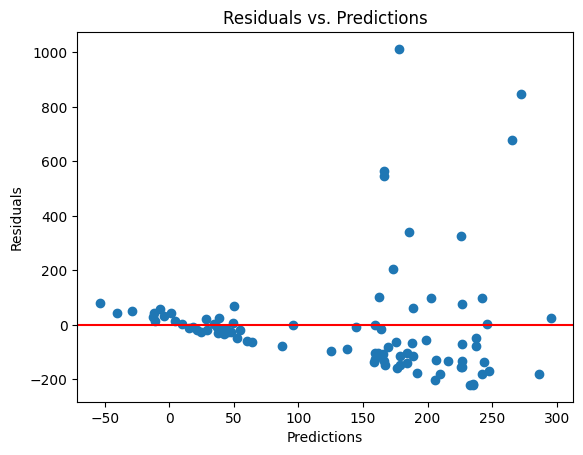

In [ ]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

# Get predictions from the model
predictions = model.predict()

# Plot residuals against predictions
plt.scatter(predictions, residuals)
plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0 for reference
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:

Spread of Residuals: The plot reveals a widening spread of residuals with increasing predicted values, suggesting heteroscedasticity—a deviation from the assumption of constant variance.

Trends: With the increase of the predicted value, the residual dispersion increases, which further indicates heteroscedasticity.

Outliers: The presence of outliers, especially for higher predicted values, raises concerns regarding their potential impact on the regression analysis and their contribution to heteroscedasticity.

Thus, the analysis indicates potential violation of the homoscedasticity assumption in the regression model, as evidenced by observed patterns and outliers in the residuals-versus-predicted-values scatterplot.

**Q8: Multicollinearity**

In [ ]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF results
print("VIF Results:")
print(vif)

VIF Results:
                Features     VIF Factor
0                  const  605661.087823
1  masculine_power_score       1.005304
2         published_year       1.004331
3       lexical_richness       1.004276


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:


The Variance Inflation Factor (VIF) results indicate that the predictors, including 'masculine_power_score', 'lexical_richness', and 'published_year', exhibit low levels of multicollinearity, as their VIF values are close to 1. This suggests that these predictors do not significantly correlate with each other.

However, the exceptionally high VIF for the constant term raises concerns. A VIF value of 605,661 suggests severe multicollinearity issues, which could lead to numerical instability in the regression model.

This anomaly may stem from large scale differences between predictors or multicollinearity problems not adequately captured by conventional VIF calculations.

In summary, while the primary predictors exhibit low multicollinearity, the extremely high VIF for the constant term indicates potential numerical instability in the model.

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?

This research proposes two very specific hypotheses (H0 and H1) to study the causal relationship between Low levels of masculinity in male characters and fanfiction success. By performing regression analysis on the data set, the test results that support H0 as correct are more significant among the valid results.



First, in Multiple Regression and Analysis, the p-value of masculine_power_score is higher than the usual significance level. The results indicated that masculine_power_score had no significant effect on kudos. This conclusion supports the H0 hypothesis.
In addition, Variance Inflation Factor (VIF) results show that the VIF values of the predictors including "masculine_power_score", "lexical_richness" and "published_year" are close to 1. It shows that there is a low level of multicollinearity between them, that is, there is no significant correlation between each other. Due to the low collinearity between these predictors, it is reasonable to assume that they do not interfere with each other in explaining the dependent variables (kudos). Therefore, this analysis results support H0.



# But beyond these validations that support H0 correctness, there are limitations to the model.


First, the models are still flawed. The VIF value of the constant term is unusually high, up to 605661, which indicates a serious multicollinearity problem. The constant term usually represents the intercept of the model, and this high collinearity can cause numerical instability of the model, which affects the accurate verification of hypothesis H0. Second, while there are tests that validate the H0 hypothesis, not all of them are valid. Some tests cannot verify H0 or H1. For example, the R-squared and Adjusted R-squared values of the model were both low, indicating that the model could only account for a small part of kudos variability. This suggests that the model may have overlooked other important factors that were not included, leading to insufficient interpretation. Furthermore, the results of the Shapiro-Wilk test show that the data does not obey the normal distribution, which does not directly prove or disprove the effect of low masculinity levels of male characters on the success of fanfiction. This test only assesses the distribution characteristics of the data and cannot directly infer the impact on the study hypothesis. Therefore, to improve the accuracy and explanatory power of the model, it is recommended to further optimize the selection of variables, consider more possible influencing factors, and adopt more complex modeling methods to analyze the factors of fanfiction's success.



In addition, to conduct quantitative research on the abstract concept of "fanfiction success", kudos in the data set are selected as a dependent variable in this study, and fanfiction success is believed to be proportional to the kudos value, which should be discussed. Because there is more than one standard for measuring the success of a story in the same humanities website, for example, the number of views, the percentage of complete reading, the number of shares, etc., can be used to evaluate the success of an online story. It is therefore recommended that a more comprehensive analysis be carried out, taking into account other measures as well.


In conclusion, in this study, although not all tests support the correctness of H0, the p-value and VIF results of masculine_power_score strongly support this hypothesis. Therefore, to obtain more effective test results, it is necessary to improve the accuracy and comprehensiveness of the model.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.